In [1]:
.libPaths('/root/miniconda3/envs/Rdoc/lib/R/library')

In [4]:
library(scran)

In [9]:
library(Rphenograph)
library(igraph)
library(dittoSeq)

In [5]:
library(SpatialExperiment)

In [66]:
T = readRDS('./T.anno.rds')

In [67]:
spe = T

In [68]:
options(repr.plot.width = 6,repr.plot.height = 6)

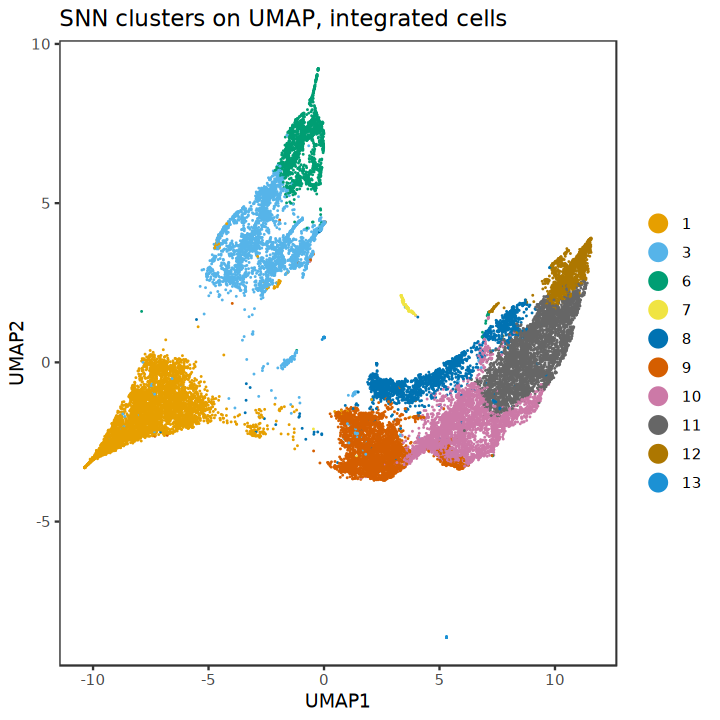

In [69]:
dittoDimPlot(spe, var = "nn_clusters_corrected", 
             reduction.use = "UMAP_mnnCorrected", size = 0.2,
             do.label = FALSE) +
    ggtitle("SNN clusters on UMAP, integrated cells")

In [70]:
ggsave('T.figure1.umap.pdf',height = 6,width = 6)

Loading required package: viridisLite



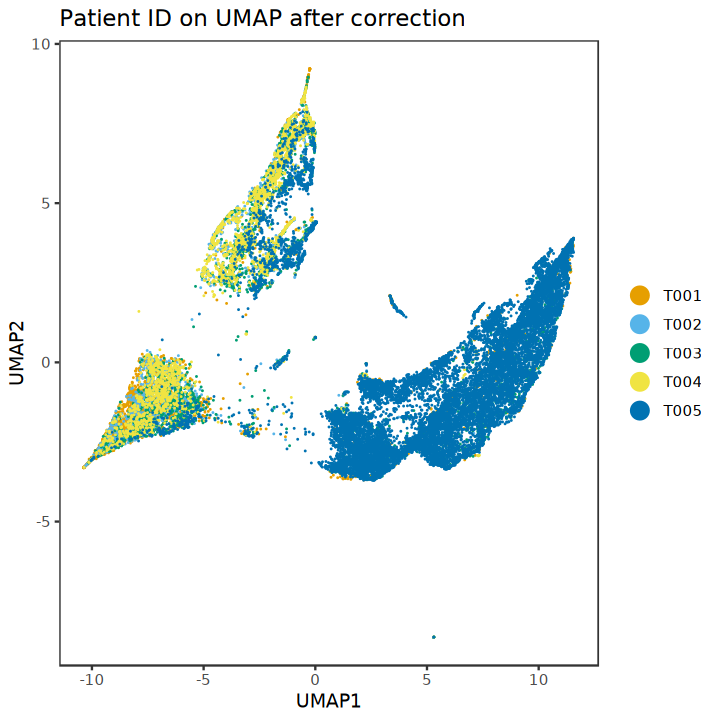

In [17]:
library(cowplot)
library(dittoSeq)
library(viridis)
dittoDimPlot(spe, var = "patient_id", 
                   reduction.use = "UMAP_mnnCorrected", size = 0.2) + 
   #scale_color_manual(values = metadata(spe)$color_vectors$patient_id) +
    ggtitle("Patient ID on UMAP after correction")

In [18]:
ggsave('T.figure1.umap2.pdf',height = 6,width = 6)

In [71]:
library(dplyr)
cluster_celltype <- recode(spe$nn_clusters_corrected,
                            '1' = 'Tcell_CD57',
                          # '2' = 'unlabel',
                            '6' = 'Tregs_FoxP3',
                           '3' ='Tregs_FoxP3',
                           '13' ='Tcell_PD1',
                           '12' = 'TCL_CD8A_GRZB',   
                            '11' = 'TCL_CD8A_GRZB',
                           '8' = 'Prolif_CD4_KI67',
                           '9' = 'Prolif_CD8_KI67',
                           '10' = 'Prolif_CD8_KI67',
                           '7' = 'Tcell_naive',
                           #'4' = 'unlabel',
                           #'5' = 'unlabel'
                                    
)

spe$celltype <- cluster_celltype

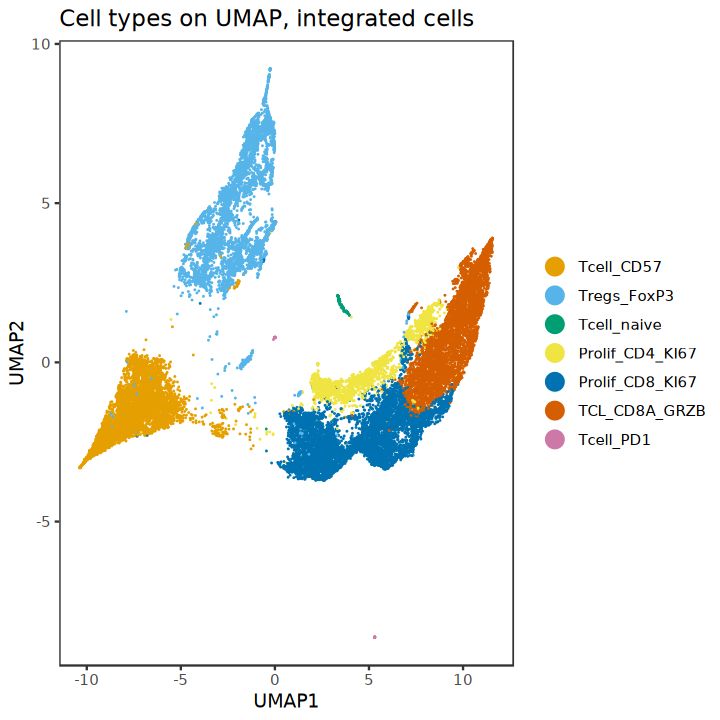

In [72]:
dittoDimPlot(spe, 
                   var = "celltype", 
                   reduction.use = "UMAP_mnnCorrected", 
                   size = 0.2,
                   do.label = FALSE) +
 # scale_color_manual(values = metadata(spe)$color_vectors$celltype) +
  theme(legend.title = element_blank()) +
  ggtitle("Cell types on UMAP, integrated cells")

In [73]:
ggsave('T.figure1.umap3.pdf',height = 6,width = 6)

In [26]:
funcge = c('FoxP3','CD69','CD4','CD8a','CD103','PD-L1','CCR7',
           'GranzymeB','PD-1','Ki-67','GATA-3','CD45RA','CD3','TNFa','CD45RO','CD57')

In [29]:
library(ggsci)

In [74]:
unique(spe$celltype)

[1] Tcell_CD57      Tregs_FoxP3     Tcell_naive     Prolif_CD4_KI67
[5] Prolif_CD8_KI67 TCL_CD8A_GRZB   Tcell_PD1      
10 Levels: Tcell_CD57 2 Tregs_FoxP3 4 5 Tcell_naive ... Tcell_PD1

In [75]:
spe$celltype = factor(spe$celltype,levels = c('Tcell_CD57',
                                              'Tregs_FoxP3','Tcell_naive','Prolif_CD4_KI67',
                                              'Prolif_CD8_KI67','TCL_CD8A_GRZB','Tcell_PD1'))

In [76]:
T = spe

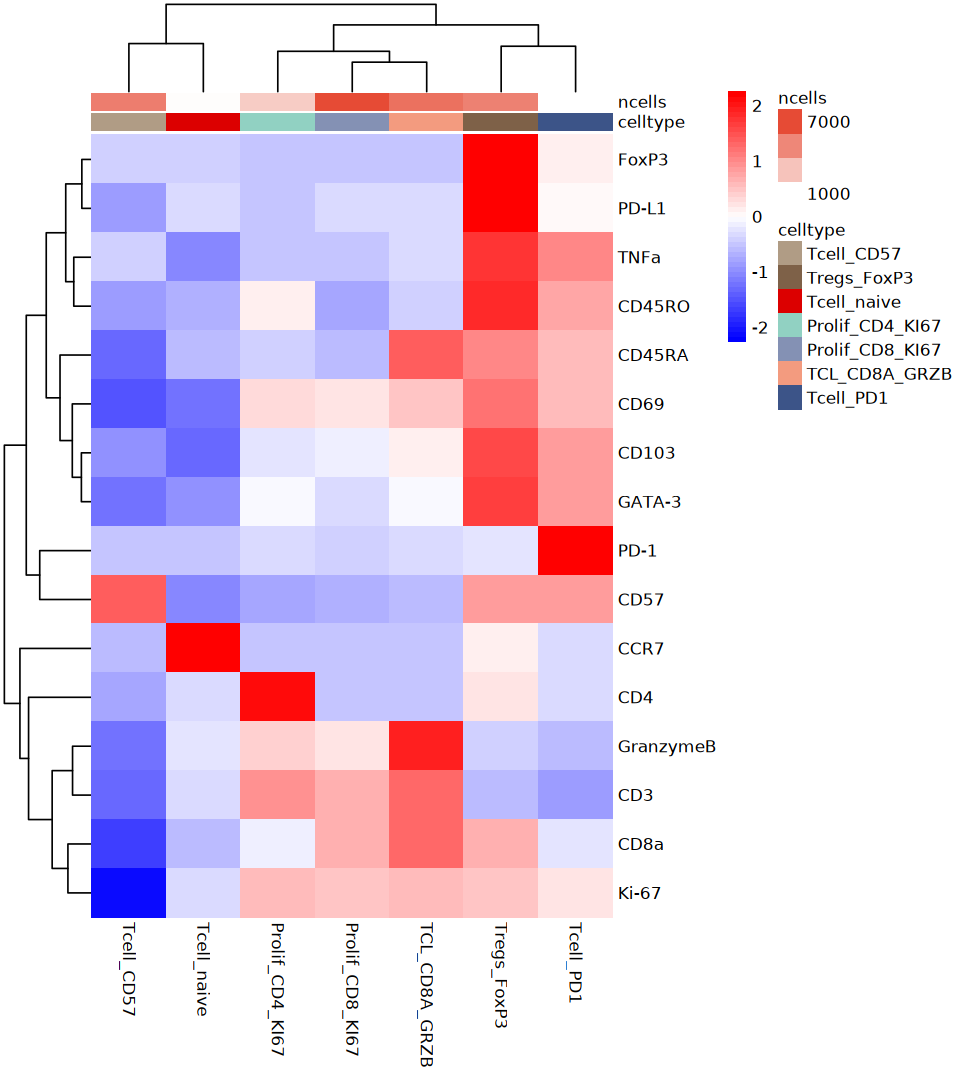

In [77]:
library(scuttle)
## aggregate by cell type
celltype_mean <- aggregateAcrossCells(as(T, "SingleCellExperiment"),  
                     ids = T$celltype, 
                     statistics = "mean",
                     use.assay.type = "exprs", 
                     subset.row = funcge)

library(dittoSeq)
library(colorspace)
library(viridis)

options(repr.plot.width = 8,repr.plot.height = 9)

p = dittoHeatmap(celltype_mean,
             assay = "exprs", 
             cluster_cols = TRUE, show_rownames = TRUE,show_colnames =TRUE,
             annot.colors = rev(pal_npg("nrc")(10)),
             annot.by = c("celltype", "ncells"))

In [78]:
pdf('T.figure2.heat.pdf',width = 6,height = 6)
p
dev.off()

png 
  2

Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is

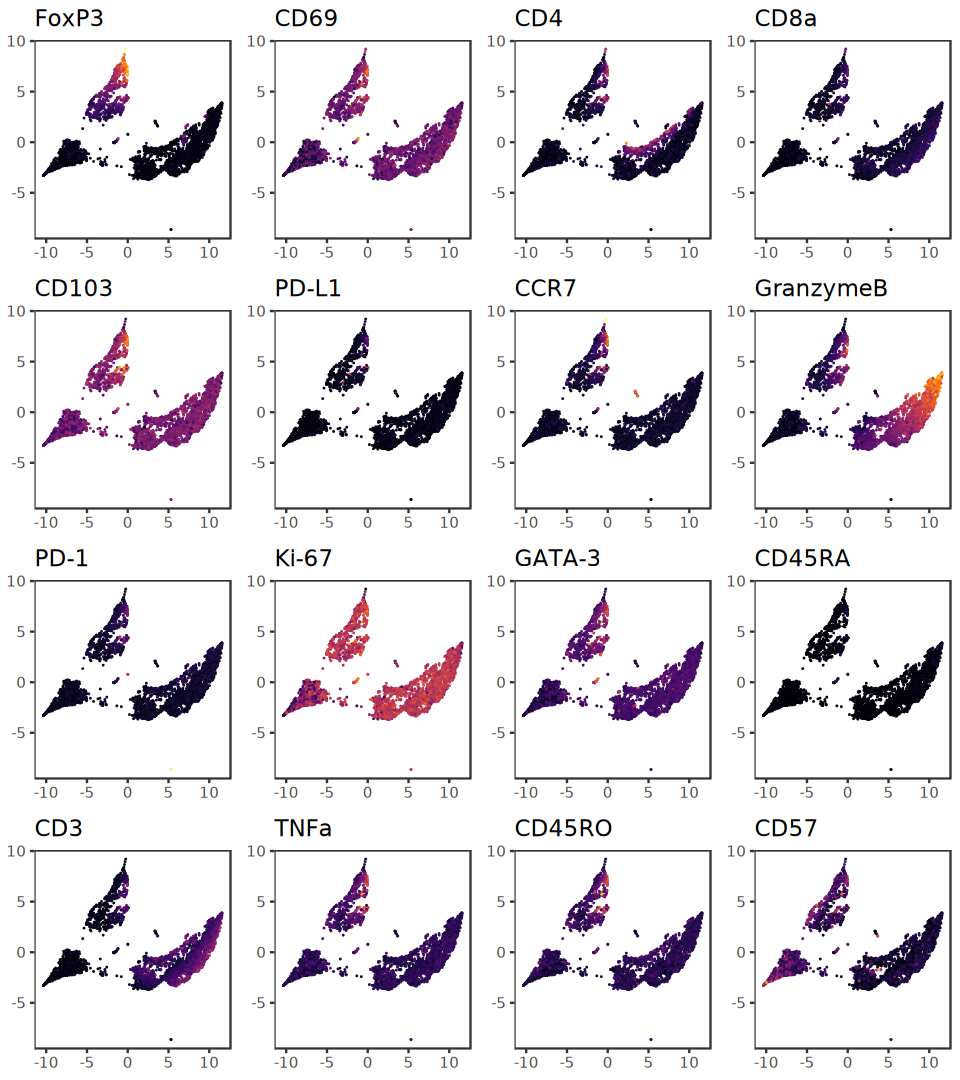

In [49]:
set.seed(220818)
cur_cells <- sample(seq_len(ncol(spe)), 4000)
plot_list <- multi_dittoDimPlot(spe[,cur_cells], var = funcge, reduction.use = "UMAP_mnnCorrected", 
                   assay = "exprs", size = 0.2, list.out = TRUE) 
plot_list <- lapply(plot_list, function(x) x + scale_color_viridis(option = "B")  )
plot_grid(plotlist = plot_list) 

In [51]:
ggsave('T.figure1.marker.pdf',height = 12,width = 12)

In [53]:
options(repr.plot.height = 6,repr.plot.width = 6)

In [60]:
p = dittoBarPlot(spe, 
             var = "celltype", 
             group.by = "patient_id") +
    scale_fill_manual(values = pal_npg("nrc")(10))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [61]:
pdf('T.figure2.barplot.pdf',width = 5,height = 5)
p
dev.off()

png 
  2

In [58]:
p = dittoBarPlot(spe, 
             scale = "count",
             var = "celltype", 
             group.by = "patient_id") +
    scale_fill_manual(values = pal_npg("nrc")(10))

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


In [59]:
pdf('T.figure2.barplot2.pdf',width = 5,height = 5)
p
dev.off()

png 
  2

In [80]:
saveRDS(spe,file = './data2/T.anno.rds')